Loading Wine Dataset...
Dataset shape: (178, 14)

First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04 

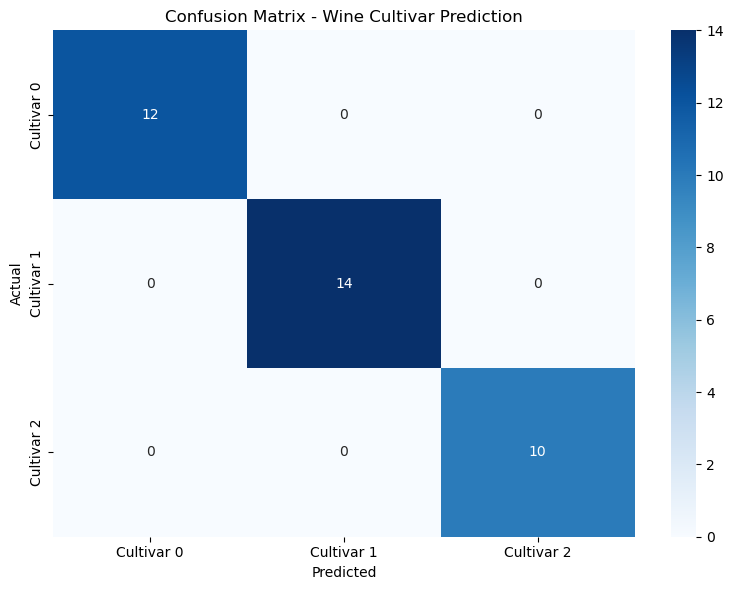


=== Feature Importance ===
           feature  importance
2  color_intensity    0.233447
4          proline    0.230014
1       flavanoids    0.210618
0          alcohol    0.138021
3              hue    0.117966
5    total_phenols    0.069934


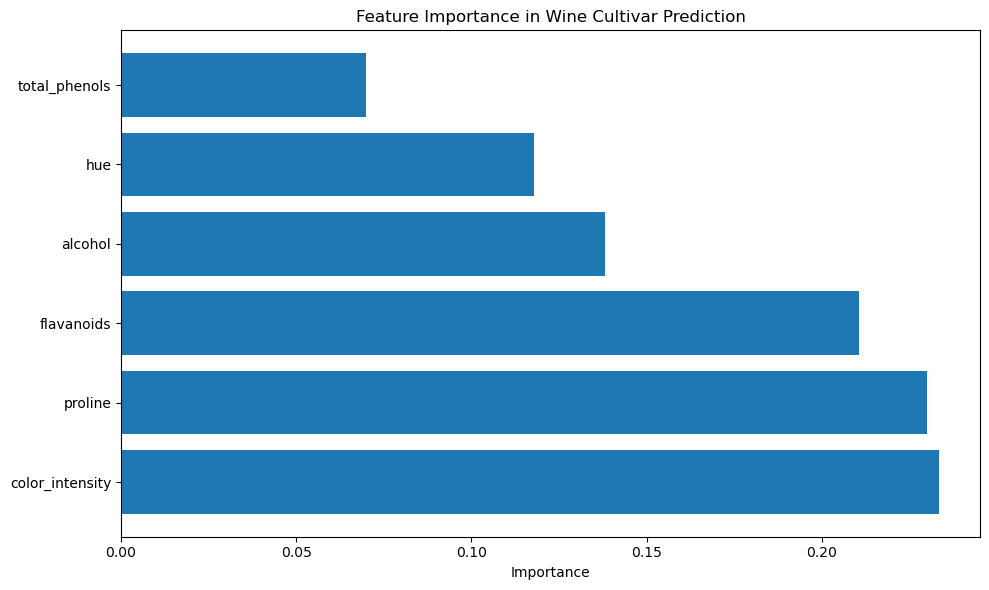


=== Saving Model ===
Model saved as: wine_cultivar_model.pkl
Scaler saved as: scaler.pkl
Selected features saved as: selected_features.pkl

=== Sample Prediction Test ===
Input features: [1.41e+01 3.32e+00 5.75e+00 1.25e+00 1.51e+03 2.95e+00]
Predicted cultivar: 0
Actual cultivar: 0

=== Model Development Complete ===
Final Test Accuracy: 1.0000
Model ready for deployment!


In [1]:
# Wine Cultivar Origin Prediction System - Model Development
# This notebook builds a multiclass classification model to predict wine cultivar

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Wine Dataset
print("Loading Wine Dataset...")
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['cultivar'] = wine.target

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# 2. Data Preprocessing

# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Feature Selection - Select 6 features
# Selected features based on importance and variety:
# 1. alcohol, 2. flavanoids, 3. color_intensity, 
# 4. hue, 5. proline, 6. total_phenols
selected_features = [
    'alcohol',
    'flavanoids', 
    'color_intensity',
    'hue',
    'proline',
    'total_phenols'
]

print(f"\n=== Selected Features ===")
print(selected_features)

# Create feature matrix X and target vector y
X = df[selected_features]
y = df['cultivar']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature Scaling (Mandatory)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== Feature Scaling Completed ===")
print(f"Scaled training data shape: {X_train_scaled.shape}")

# 3. Model Training - Random Forest Classifier
print("\n=== Training Random Forest Classifier ===")
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)

model.fit(X_train_scaled, y_train)
print("Model training completed!")

# 4. Model Evaluation
print("\n=== Model Evaluation ===")

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Cultivar 0', 'Cultivar 1', 'Cultivar 2']))

# Confusion Matrix
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cultivar 0', 'Cultivar 1', 'Cultivar 2'],
            yticklabels=['Cultivar 0', 'Cultivar 1', 'Cultivar 2'])
plt.title('Confusion Matrix - Wine Cultivar Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importance ===")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Wine Cultivar Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Save the Model and Scaler
print("\n=== Saving Model ===")
joblib.dump(model, 'wine_cultivar_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

print("Model saved as: wine_cultivar_model.pkl")
print("Scaler saved as: scaler.pkl")
print("Selected features saved as: selected_features.pkl")

# Test loading the model
loaded_model = joblib.load('wine_cultivar_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Make a sample prediction
sample_input = X_test.iloc[0:1]
sample_scaled = loaded_scaler.transform(sample_input)
prediction = loaded_model.predict(sample_scaled)

print(f"\n=== Sample Prediction Test ===")
print(f"Input features: {sample_input.values[0]}")
print(f"Predicted cultivar: {prediction[0]}")
print(f"Actual cultivar: {y_test.iloc[0]}")

print("\n=== Model Development Complete ===")
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Model ready for deployment!")